In [1]:
from hud.task import Task
from hud.types import CustomGym
from hud import gym
from pathlib import Path
import logging

logging.basicConfig(level=logging.INFO)

In [3]:
custom_gym = CustomGym(
    image_or_build_context=Path("../environments/pokemon_controller"),
    location="local",  # Make sure you have docker running locally!
)

task = Task(
    gym=custom_gym,
    prompt="Lets play Pokemon Red",
    setup=("setup", "pokemon_red"),
    evaluate="evaluate",
)

env = await gym.make(task)

INFO:hud.env.local_docker_client:generated tar file with size: 50 KB
INFO:hud.env.local_docker_client:Step 1/4 : FROM socpite/pokemon_env:latest
INFO:hud.env.local_docker_client:

INFO:hud.env.local_docker_client: ---> 084a367271dc

INFO:hud.env.local_docker_client:Step 2/4 : COPY . /controller
INFO:hud.env.local_docker_client:

INFO:hud.env.local_docker_client: ---> 9dae79b7ee94

INFO:hud.env.local_docker_client:Step 3/4 : RUN pip install -e /controller --break-system-packages
INFO:hud.env.local_docker_client:

INFO:hud.env.local_docker_client: ---> [Warning] The requested image's platform (linux/amd64) does not match the detected host platform (linux/arm64/v8) and no specific platform was requested

INFO:hud.env.local_docker_client: ---> Running in a6d7f6b7c929

INFO:hud.env.local_docker_client:Obtaining file:///controller

INFO:hud.env.local_docker_client:  Installing build dependencies: started

INFO:hud.env.local_docker_client:  Installing build dependencies: finished with status 

Initial observation complete
========= Step 1 =========


INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages?beta=true "HTTP/1.1 200 OK"


Agent's action: [PressAction(type='press', keys=['start']), WaitAction(type='wait', time=1000)]


{'player_x': 0, 'player_y': 0, 'map_id': 0, 'is_paused': False}



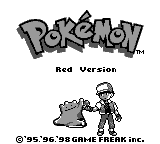

========= Step 2 =========


INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages?beta=true "HTTP/1.1 200 OK"


Agent's action: [PressAction(type='press', keys=['start']), WaitAction(type='wait', time=1500)]


{'player_x': 0, 'player_y': 0, 'map_id': 0, 'is_paused': False}



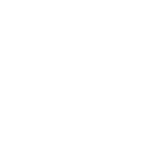

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x1072d6b40>


========= Step 3 =========


INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages?beta=true "HTTP/1.1 200 OK"


Agent's action: [WaitAction(type='wait', time=2000), PressAction(type='press', keys=['start']), WaitAction(type='wait', time=1000)]


{'player_x': 6, 'player_y': 3, 'map_id': 38, 'is_paused': False}



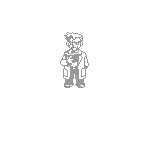

========= Step 4 =========


INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages?beta=true "HTTP/1.1 200 OK"


Agent's action: [PressAction(type='press', keys=['a']), WaitAction(type='wait', time=1000)]


{'player_x': 6, 'player_y': 3, 'map_id': 38, 'is_paused': False}



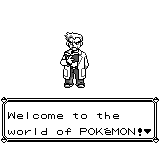

========= Step 5 =========


INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages?beta=true "HTTP/1.1 200 OK"


Agent's action: [PressAction(type='press', keys=['a']), WaitAction(type='wait', time=1000)]


{'player_x': 6, 'player_y': 3, 'map_id': 38, 'is_paused': False}



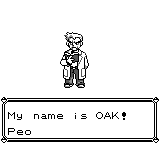

========= Step 6 =========


INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages?beta=true "HTTP/1.1 200 OK"


Agent's action: [PressAction(type='press', keys=['a']), WaitAction(type='wait', time=1000)]


{'player_x': 6, 'player_y': 3, 'map_id': 38, 'is_paused': False}



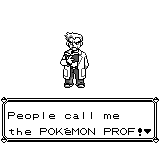

========= Step 7 =========


INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages?beta=true "HTTP/1.1 200 OK"


Agent's action: [PressAction(type='press', keys=['a']), WaitAction(type='wait', time=1000)]


{'player_x': 6, 'player_y': 3, 'map_id': 38, 'is_paused': False}



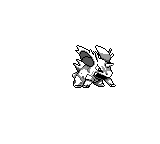

========= Step 8 =========


INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages?beta=true "HTTP/1.1 200 OK"


Agent's action: [PressAction(type='press', keys=['a']), WaitAction(type='wait', time=1000)]


{'player_x': 6, 'player_y': 3, 'map_id': 38, 'is_paused': False}



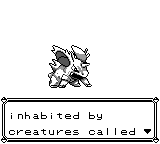

========= Step 9 =========


INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages?beta=true "HTTP/1.1 200 OK"


Agent's action: [PressAction(type='press', keys=['a']), WaitAction(type='wait', time=1000)]


{'player_x': 6, 'player_y': 3, 'map_id': 38, 'is_paused': False}



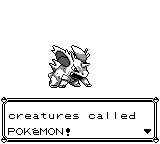

========= Step 10 =========


INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages?beta=true "HTTP/1.1 200 OK"


Agent's action: [PressAction(type='press', keys=['a']), WaitAction(type='wait', time=1000)]


{'player_x': 6, 'player_y': 3, 'map_id': 38, 'is_paused': False}



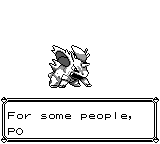

In [4]:
from hud.agent import ClaudePlaysPokemon
from hud.utils.telemetry import display_screenshot

agent = ClaudePlaysPokemon()

obs, _ = await env.reset()
print(f"Initial observation complete")

# Agent loop
for i in range(10):
    print(f"========= Step {i + 1} =========")
    action, done = await agent.predict(obs)
    print(f"Agent's action: {action}")

    if done:
        print("done")
        break

    obs, reward, terminated, info = await env.step(action)

    if terminated:
        print("terminated")
        break

    print(obs.text)
    display_screenshot(obs.screenshot, width=160, height=144)

In [5]:
await env.evaluate()

{'badges': 0, 'num_pokemon_in_party': 0, 'money': 0, 'map_id': 38}

In [6]:
await env.close()